In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from blg_strain.lattice import StrainedLattice
from blg_strain.bands import BandStructure, FilledBands

"All parameters" here refers to $\gamma_3$, $\gamma_4$, $\gamma_n$, and $\Delta_{AB}$

# Function to plot $\alpha$ vs $E_F$ for fixed $\Delta$, $\varepsilon$

In [9]:
def calculate(turn_off=[]):
    eps=0.01
    slzz = StrainedLattice(eps, 0, turn_off=turn_off)
    slac = StrainedLattice(eps, np.pi/2, turn_off=turn_off)
    
    bszz = BandStructure(slzz, Delta=0.01)
    bsac = BandStructure(slac, Delta=0.01)

    bszz.calculate(500, 500)
    bsac.calculate(500, 500)
    
    alphaszz = []
    alphasac = []
    EFs = np.linspace(0,0.02, 30)
    for EF in EFs:
        fbzz = FilledBands(bszz, EF=EF, T=0)
        fbzz.calculate()
        alphaszz.append(fbzz.alpha[0])
        fbac = FilledBands(bsac, EF=EF, T=0)
        fbac.calculate()
        alphasac.append(fbac.alpha[0])
        
    fig, ax = plt.subplots()
    ax.plot(EFs, alphaszz)
    ax.plot(EFs, alphasac)

# All parameters off

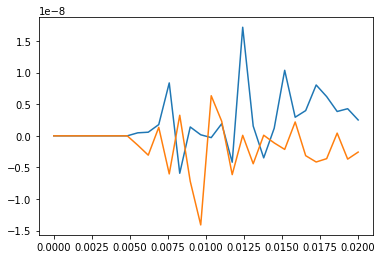

In [10]:
calculate(['gamma3', 'gamma4', 'gamman', 'DeltaAB'])

# All parameters on

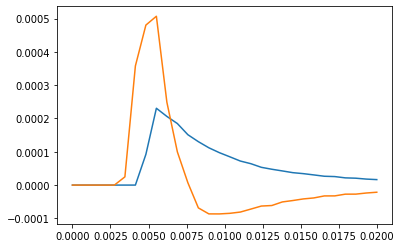

In [11]:
calculate([])

In [18]:
from blg_strain.utils.const import mu0

In [20]:
tau = 1e-12
Efield = 100
(.0005 * tau * Efield / mu0)

3.978873577297384e-08

maximum of 40 nA = 4000 $\mu_B/\mu m^2$! But why is the band edge only at 2.5 meV?

# $\gamma_3$ only

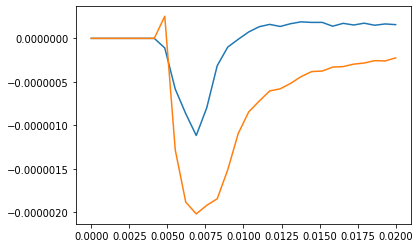

In [12]:
calculate(['gamma4', 'gamman', 'DeltaAB'])

# $\gamma_3$, $\gamma_4$, $\Delta_{AB}$

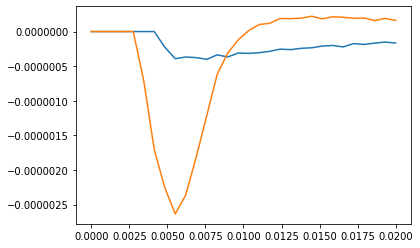

In [13]:
calculate(['gamman'])

# $\gamma_n$ only

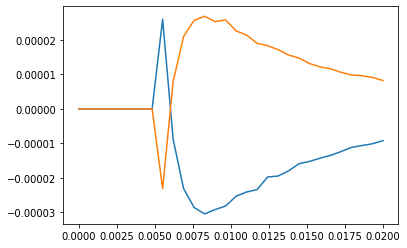

In [14]:
calculate(['gamma4', 'gamma3', 'DeltaAB'])

# $\gamma_n$, $\gamma_4$, $\Delta_{AB}$

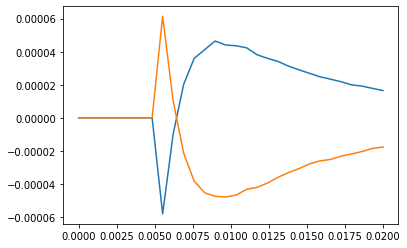

In [15]:
calculate(['gamma3'])

# Check bands all parameters on

In [21]:
eps=0.01
slzz = StrainedLattice(eps, 0)
slac = StrainedLattice(eps, np.pi/2)

bszz = BandStructure(slzz, Delta=0.01)
bsac = BandStructure(slac, Delta=0.01)

bszz.calculate(500, 500)
bsac.calculate(500, 500)

In [30]:
%matplotlib notebook

In [35]:
bsac.K.E[2].min(), bsac.K.E[1].max(), bsac.Kp.E[2].min(), bsac.Kp.E[1].max()

(0.003421346150751292,
 -0.003421346150751403,
 0.003421346150751514,
 -0.003421346150751514)

<IPython.core.display.Javascript object>


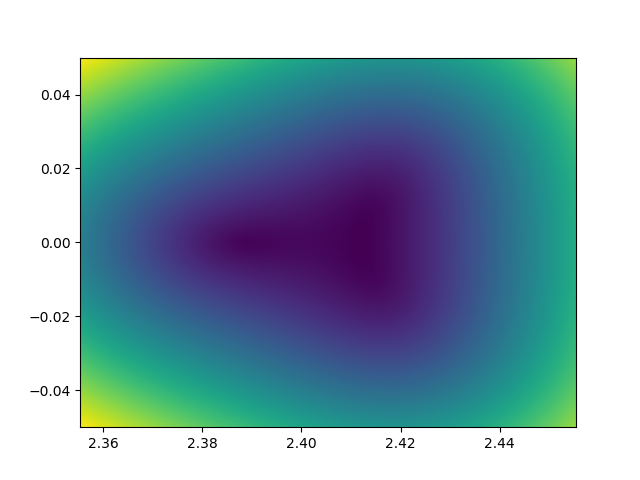

In [40]:
fig, ax = plt.subplots()
ax.pcolormesh(bsac.K.Kxa, bsac.K.Kya, bsac.K.E[2])

<IPython.core.display.Javascript object>


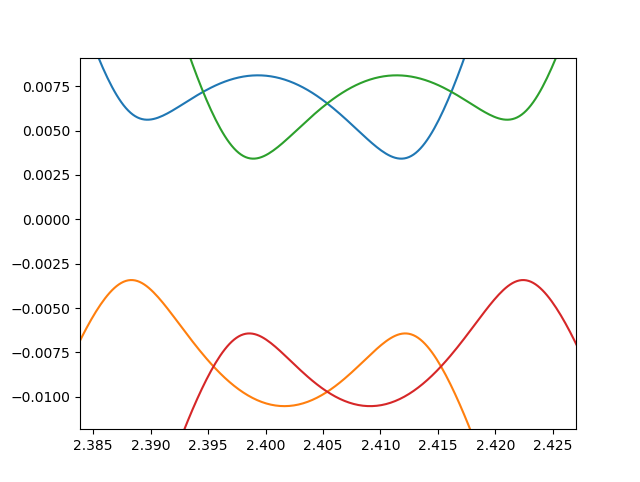

In [36]:
fig, ax = plt.subplots()
ax.plot(bsac.K.kxa, bsac.K.E[2][:,250])
ax.plot(bsac.K.kxa, bsac.K.E[1][:,250])

ax.plot(bsac.K.kxa, bsac.Kp.E[2][:,250])
ax.plot(bsac.K.kxa, bsac.Kp.E[1][:,250])
# ax.pcolormesh(bszz.K.Kxa, bszz.K.Kya, bszz.K.E[2])